In [1]:
import FinanceDataReader as fdr
import datetime

start_date = datetime.datetime.now() - datetime.timedelta(days=365*20)
# 현재 시간으로부터 20년 전 날짜 계산


df_kospi = fdr.DataReader('KS11', start_date).add_suffix('_kospi')
df_kosdaq = fdr.DataReader('KQ11', start_date).add_suffix('_kosdaq')
df_dow = fdr.DataReader('DJI', start_date).add_suffix('_dow')
df_nasdaq = fdr.DataReader('IXIC', start_date).add_suffix('_nasdaq')
df_snp500 = fdr.DataReader('US500', start_date).add_suffix('_s&p500')

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [5]:
df_kospi

,Open_kospi,High_kospi,Low_kospi,Close_kospi,Adj Close_kospi,Volume_kospi
Date,,,,,,
2003-03-07,547.890015,555.380005,544.090027,546.020020,546.020020,635100.0
2003-03-10,545.539978,548.289978,541.289978,544.239990,544.239990,607100.0
2003-03-11,531.780029,538.619995,530.549988,532.530029,532.530029,657900.0
2003-03-12,531.169983,534.760010,524.530029,531.809998,531.809998,793800.0
2003-03-13,530.859985,531.780029,514.429993,531.780029,531.780029,679700.0
...,...,...,...,...,...,...
2023-02-22,2430.870117,2435.979980,2416.159912,2417.679932,2417.679932,426700.0
2023-02-23,2430.010010,2449.620117,2422.620117,2439.090088,2439.090088,400300.0
2023-02-24,2442.489990,2452.969971,2421.469971,2423.610107,2423.610107,369200.0


In [4]:
# df_heelim = fdr.DataReader('037440', start_date).add_suffix('_heelim')
df_heelim = fdr.DataReader('037440', start_date)
df_aps = fdr.DataReader('054620', start_date).add_suffix('_aps_holdings')
data_aps = pd.merge(df_kospi, df_kosdaq, on='Date').merge(df_dow, on='Date').merge(df_nasdaq, on='Date').merge(df_snp500, on='Date').merge(df_aps, on='Date')
data_heelim = pd.merge(df_kospi, df_kosdaq, on='Date').merge(df_dow, on='Date').merge(df_nasdaq, on='Date').merge(df_snp500, on='Date').merge(df_heelim, on='Date')

In [3]:
normalizer = preprocessing.MinMaxScaler()

In [7]:
df_heelim.describe()

,Open,High,Low,Close,Volume,Change
count,4942.000000,4942.000000,4942.000000,4942.000000,4.942000e+03,4942.000000
mean,5396.352489,5503.912384,5284.143059,5396.542088,2.653289e+05,0.000888
std,2663.477104,2727.953808,2599.956435,2657.316602,1.315753e+06,0.029959
min,762.000000,809.000000,747.000000,748.000000,0.000000e+00,-0.176119
25%,3980.000000,4044.250000,3900.000000,3980.000000,6.658750e+03,-0.009506
50%,5302.500000,5450.000000,5180.000000,5295.000000,2.254600e+04,0.000000
75%,7150.000000,7288.750000,7000.000000,7150.000000,7.155675e+04,0.008952
max,14160.000000,14850.000000,13250.000000,13650.000000,3.481206e+07,0.300000


In [23]:
prep_heelim = df_heelim
prep_heelim['Volume'] = df_heelim['Volume'].replace(0, np.nan)
prep_heelim = prep_heelim.dropna()
prep_heelim

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2003-03-07,982,1065,982,1063,185.0,0.000000
2003-03-10,991,1063,972,1052,1414.0,-0.010348
2003-03-11,1055,1063,1055,1056,2002.0,0.003802
2003-03-12,1055,1055,1055,1056,3000.0,0.000000
2003-03-14,1078,1082,1011,1063,7515.0,0.017225
...,...,...,...,...,...,...
2023-02-22,10100,10180,9970,10000,488908.0,-0.020568
2023-02-23,9980,10050,9840,9900,333425.0,-0.010000
2023-02-24,10000,10340,9880,9950,975178.0,0.005051


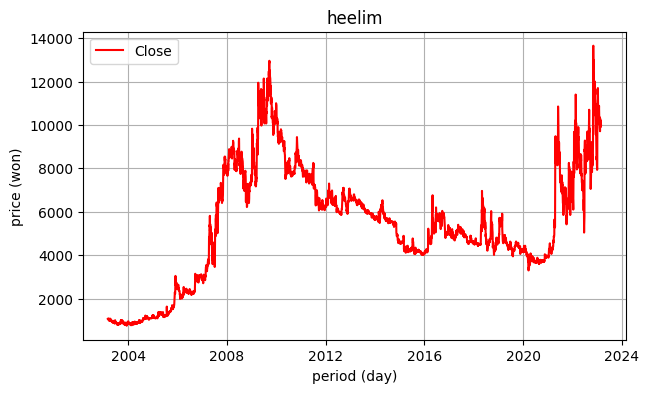

In [27]:
plt.figure(figsize=(7,4))

plt.title('heelim')
plt.ylabel('price (won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(df_heelim['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()

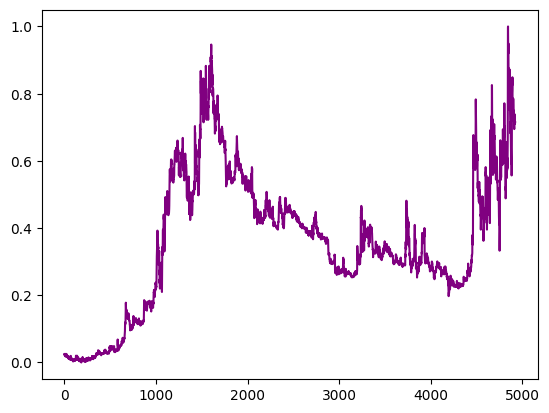

In [28]:
norm_cols = ['Open', 'Close', 'Volume']
norm_heelim_np = normalizer.fit_transform(prep_heelim[norm_cols])

norm_heelim = pd.DataFrame(norm_heelim_np, columns=norm_cols)
norm_heelim

plt.plot(norm_heelim['Close'], label='Close', color='purple')
plt.show()

In [29]:
feature_cols = ['Open', 'Close', 'Volume']
label_cols = ['Close']

feature_df = pd.DataFrame(norm_heelim, columns=feature_cols)
label_df = pd.DataFrame(norm_heelim, columns=label_cols)

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

In [31]:
def make_sequence_dataset(feature, label, window_size):
    feature_list = []
    label_list = []

    for i in range(len(feature) - window_size):
        feature_list.append(feature[i:i + window_size])
        label_list.append(label[i + window_size])
    
    return np.array(feature_list), np.array(label_list)

window_size = 40

X, Y = make_sequence_dataset(feature_np, label_np, window_size)

(4882, 40, 3)

In [32]:
split = -200

x_train = X[:split]
y_train = Y[:split]

x_test = X[split:]
y_test = Y[split:]

In [ ]:
input_size = window_size
sequence_length = 3 # Open, Close, Volume
num_layers = 2
hidden_size = 256
num_classes = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 2

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [33]:
#input_size = 784
input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 2

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class BRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

model = BRNN(input_size, hidden_size, num_layers, num_classes).to(device)

criterion = nn.CrossEntropyLoss()

In [16]:
train_dataset = datasets.MNIST(root='dataset/', train=True,  transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False,  transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class BRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self,num_layers*2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self,num_layers*2, x.size(0), self.hidden_size).to(device)

In [19]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class BRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

model = BRNN(input_size, hidden_size, num_layers, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [20]:
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to coda if possible
        data = data.to(device=device).squeeze(1)
        targets = targets.to(device=device)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

def check_accuracy(loader, model):
    if loader.dataset.train:
        print('Checking accuracy on training data')
    else:
        print('checking accuracy on test data')
    
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device).squeeze(1)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

            print(f'Got {num_correct} / {num_samples} with accuracy \
                {float(num_correct) / float(num_samples) * 100:.2f}')
    
    model.train()

check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 63 / 64 with accuracy                 98.44
Got 126 / 128 with accuracy                 98.44
Got 189 / 192 with accuracy                 98.44
Got 253 / 256 with accuracy                 98.83
Got 316 / 320 with accuracy                 98.75
Got 380 / 384 with accuracy                 98.96
Got 443 / 448 with accuracy                 98.88
Got 506 / 512 with accuracy                 98.83
Got 567 / 576 with accuracy                 98.44
Got 630 / 640 with accuracy                 98.44
Got 694 / 704 with accuracy                 98.58
Got 757 / 768 with accuracy                 98.57
Got 820 / 832 with accuracy                 98.56
Got 882 / 896 with accuracy                 98.44
Got 946 / 960 with accuracy                 98.54
Got 1009 / 1024 with accuracy                 98.54
Got 1073 / 1088 with accuracy                 98.62
Got 1136 / 1152 with accuracy                 98.61
Got 1199 / 1216 with accuracy                 98.60
Got 1261 